Data retrieved successfully for temperature1 and humidity1.
Data saved to CSV file: sensor_temp_hum_analysis.csv

First 5 rows of the dataset:
         Sensor               Timestamp  Value
0  temperature1 2025-02-24 06:21:48.805  23.01
1  temperature1 2025-02-24 06:19:49.612  21.65
2  temperature1 2025-02-24 06:17:50.473  19.53
3  temperature1 2025-02-24 06:15:51.483  18.35
4  temperature1 2025-02-24 06:13:52.465  18.36

Statistical Summary of the dataset:
                           Timestamp       Value
count                            200  200.000000
mean   2025-02-24 04:43:38.658909696   37.298650
min       2025-02-24 03:05:28.995000   16.470000
25%    2025-02-24 03:54:33.853000192   17.520000
50%    2025-02-24 04:43:38.727000064   38.800000
75%    2025-02-24 05:32:43.608249856   57.130000
max       2025-02-24 06:21:48.805000   58.160000
std                              NaN   19.893481

Temperature1 Data Preview:
         Sensor               Timestamp  Value
0  temperature1 2025-0

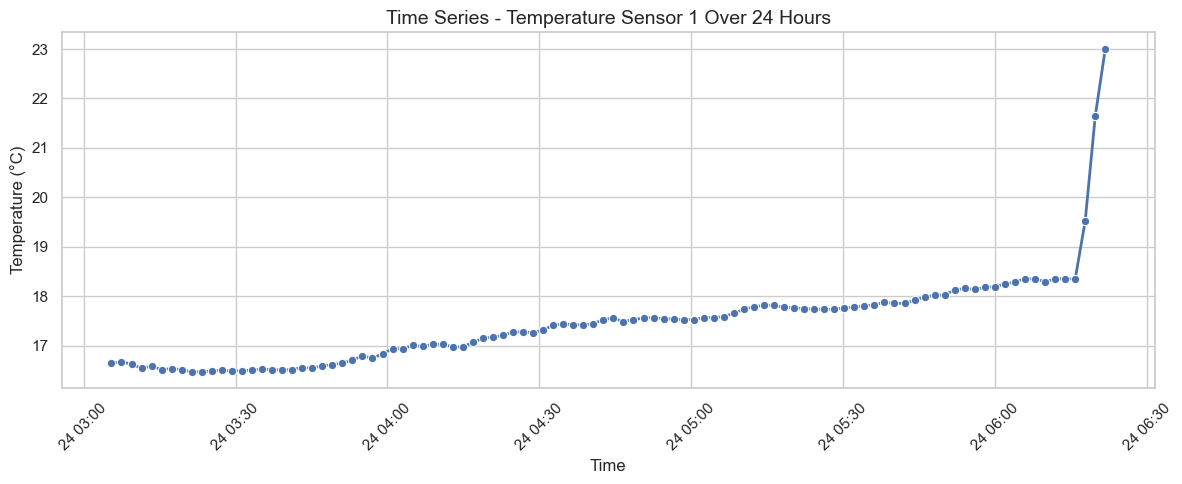

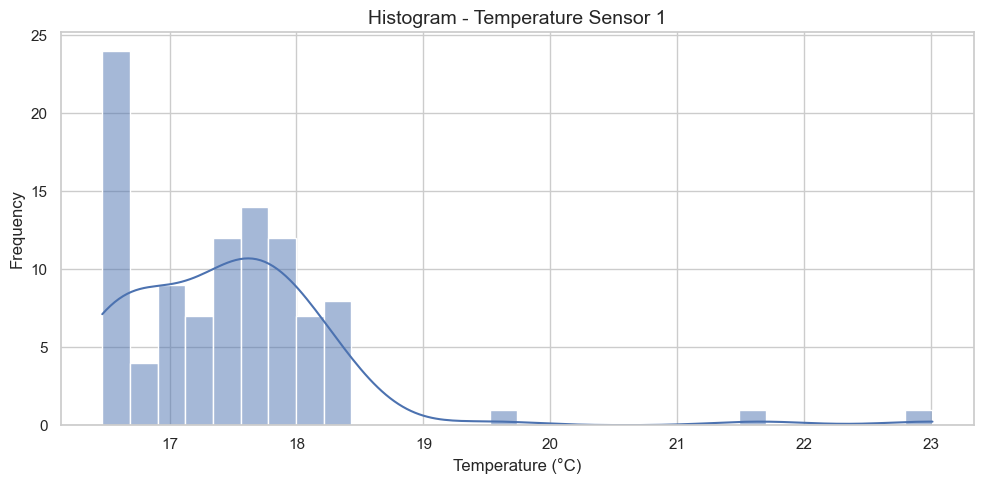

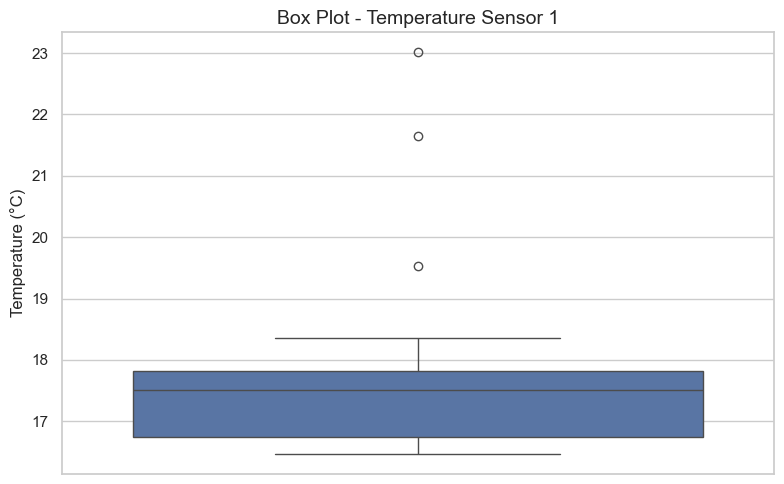


Humidity1 Data Preview:
        Sensor               Timestamp  Value
100  humidity1 2025-02-24 06:21:48.805  54.59
101  humidity1 2025-02-24 06:19:49.612  56.75
102  humidity1 2025-02-24 06:17:50.473  55.51
103  humidity1 2025-02-24 06:15:51.483  56.79
104  humidity1 2025-02-24 06:13:52.465  56.70


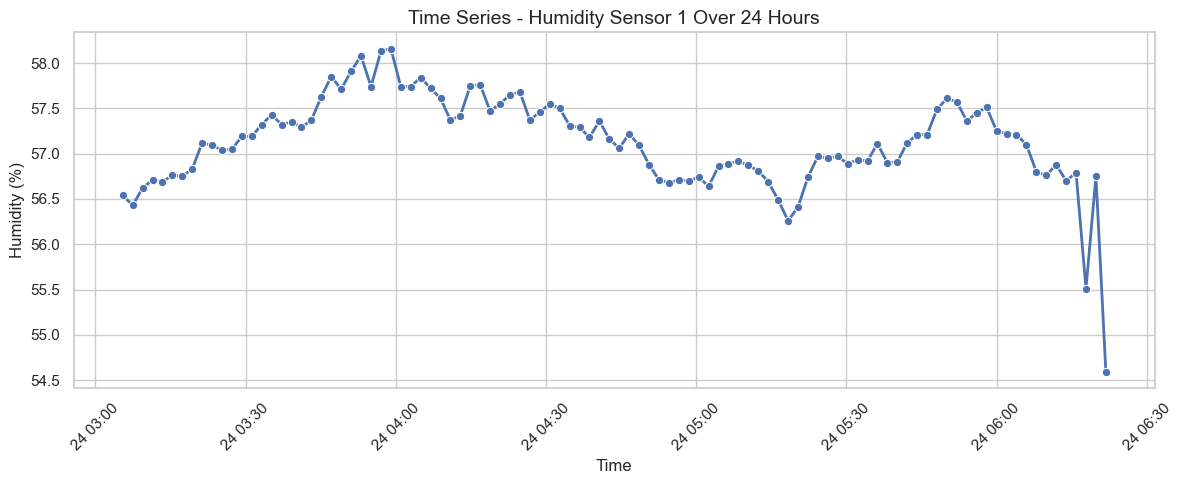

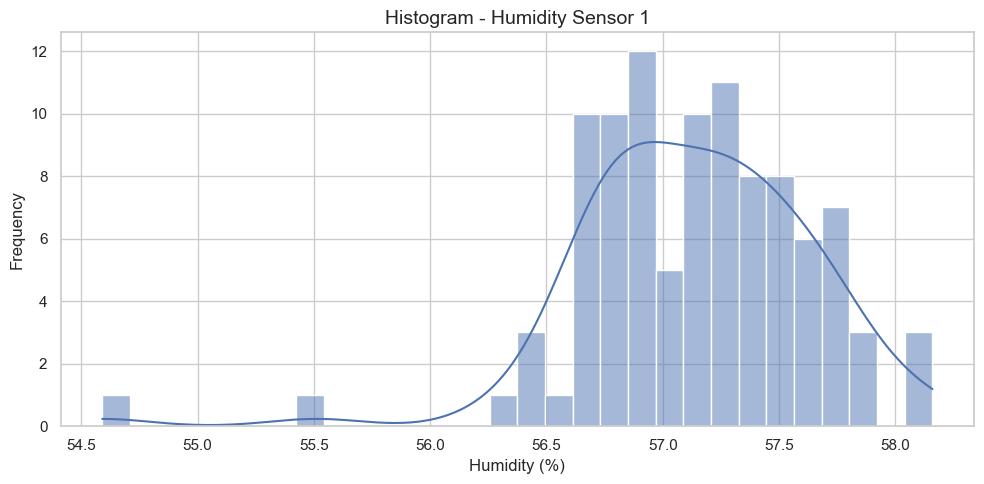

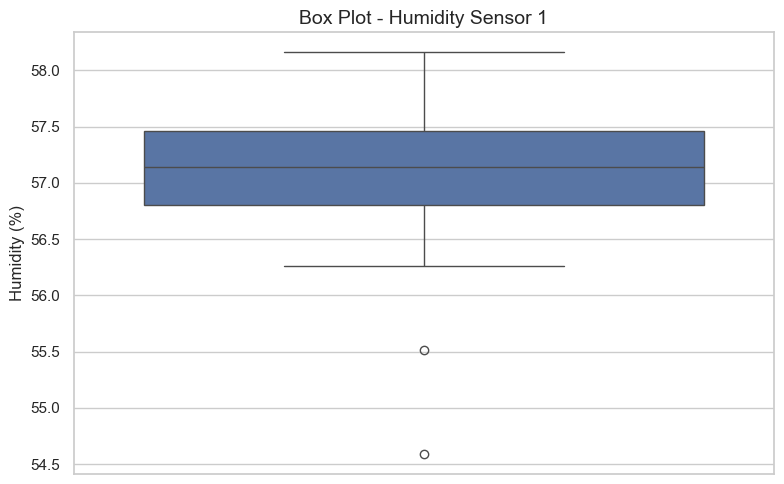

In [3]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# API Configuration and Setup
# ----------------------------
url = "https://iot.enlightcloud.com/api/plugins/telemetry/DEVICE/{deviceId}/values/timeseries"
device_id = "a349bfa0-c1dc-11ef-8a50-2597fc5b248e"
token = ("Bearer eyJhbGciOiJIUzUxMiJ9.eyJzdWIiOiJnYW5lc2guZ2Fpa3dhZEBlc2RzLmNvLmluIiwidXNlcklkIjoiZWY3NDcxYjAtZjMzYi0xMWVlLThlNDQtMmJlM2ZmZmE4YmQyIiwic2NvcGVzIjpbIlRFTkFOVF9BRE1JTiJdLCJzZXNzaW9uSWQiOiI4ODc4YTNkMi0xYTA2LTQ0MTEtYmU2OC1iOWRjMTNkNWVkMjUiLCJleHAiOjE3NDAzODIxOTcsImlzcyI6InRoaW5nc2JvYXJkLmlvIiwiaWF0IjoxNzQwMzczMTk3LCJmaXJzdE5hbWUiOiJHYW5lc2giLCJsYXN0TmFtZSI6IkdhaWt3YWQiLCJlbmFibGVkIjp0cnVlLCJpc1B1YmxpYyI6ZmFsc2UsInRlbmFudElkIjoiZWUyOWEyMzAtZjMzYi0xMWVlLThlNDQtMmJlM2ZmZmE4YmQyIiwiY3VzdG9tZXJJZCI6IjEzODE0MDAwLTFkZDItMTFiMi04MDgwLTgwODA4MDgwODA4MCJ9.5bBB0cg6cn7Jg-mSxGI9Q4nlOnbXkrvIFuqKMz2ceNcnHSm5z8DRQ3cp4wgSqm68U8JlOb_J62es8NYxpJ5itw")
headers = {
    "Content-Type": "application/json",
    "Authorization": token
}

# -------------------------------------------
# Calculate the Timestamps for the 24-Hour Range
# -------------------------------------------
end_ts = int(time.time() * 1000)               # Current time in milliseconds
start_ts = end_ts - (24 * 60 * 60 * 1000)        # 24 hours ago

params = {
    "keys": "temperature1,humidity1",
    "startTs": start_ts,
    "endTs": end_ts
}

full_url = url.format(deviceId=device_id)

# ---------------------
# API Request and Data Processing
# ---------------------
try:
    response = requests.get(full_url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        print("Data retrieved successfully for temperature1 and humidity1.")
        
        # Convert JSON data to a list of rows
        rows = []
        for sensor, measurements in data.items():
            for measurement in measurements:
                rows.append({
                    "Sensor": sensor,
                    "Timestamp": measurement['ts'],
                    "Value": float(measurement['value'])
                })
                
        df = pd.DataFrame(rows)
        # Convert timestamp to datetime
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
        
        # Save to a new CSV file
        csv_filename = "sensor_temp_hum_analysis.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Data saved to CSV file: {csv_filename}")
    else:
        print(f"Error: {response.status_code} - {response.text}")
except Exception as e:
    print(f"Connection error: {str(e)}")

# ----------------------------
# Data Science Operations: Display Data Summary
# ----------------------------
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nStatistical Summary of the dataset:")
print(df.describe())

# ----------------------------
# Visualization Functions
# ----------------------------
sns.set_theme(style="whitegrid")

def plot_time_series(sensor_df, sensor_name, ylabel):
    plt.figure(figsize=(12, 5))
    sns.lineplot(x="Timestamp", y="Value", data=sensor_df, marker="o", linewidth=2)
    plt.title(f"Time Series - {sensor_name} Over 24 Hours", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_histogram(sensor_df, sensor_name, xlabel):
    plt.figure(figsize=(10, 5))
    sns.histplot(sensor_df["Value"], kde=True, bins=30)
    plt.title(f"Histogram - {sensor_name}", fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_boxplot(sensor_df, sensor_name, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=sensor_df["Value"])
    plt.title(f"Box Plot - {sensor_name}", fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

# ----------------------------
# Generate Plots for Temperature1 and Humidity1
# ----------------------------
# Filter data for temperature1 and humidity1
temp1_df = df[df["Sensor"] == "temperature1"]
hum1_df = df[df["Sensor"] == "humidity1"]

# Temperature1 Plots
print("\nTemperature1 Data Preview:")
print(temp1_df.head())

plot_time_series(temp1_df, "Temperature Sensor 1", "Temperature (°C)")
plot_histogram(temp1_df, "Temperature Sensor 1", "Temperature (°C)")
plot_boxplot(temp1_df, "Temperature Sensor 1", "Temperature (°C)")

# Humidity1 Plots
print("\nHumidity1 Data Preview:")
print(hum1_df.head())

plot_time_series(hum1_df, "Humidity Sensor 1", "Humidity (%)")
plot_histogram(hum1_df, "Humidity Sensor 1", "Humidity (%)")
plot_boxplot(hum1_df, "Humidity Sensor 1", "Humidity (%)")
